# Homework 5

## William Olsen

The purpose of this homework is to work carefully through a numeric/simulted solution to Bayes' Theorem. Bayes' Theorem reads:

𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎)=𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)/𝑃(𝑑𝑎𝑡𝑎)
 
Effectively the goal of this homework (and the lab) is to find  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎) .

Reading through Bayes' theorem it says that given a data reading, the probability it was produced by a given true signal  (𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎)) , is equal to the probability of getting a particular data reading given a certain true signal  (𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙))  times the probability of the signal having a particular strength  (𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)) , divided by the probability of each data reading  (𝑃(𝑑𝑎𝑡𝑎)) .

This is just math, so is true. But in practice it is quite subtle how to use this. A few pointers:
- 𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎)  is what we want to know. What was the probability distribution of the true signal given the measurement we have? Unfortunately it is hard to calculate from first principles.
- 𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)  Is usually easy to determine. If we have a signal-free background (see first 4 weeks of this class), we can inject fake signals of known strength and then simulate the observations in the presence of known (fake) signals. This means we can easily generate  𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙) .
- 𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)  is called a prior. It is the probability the signal has a particular strength. Priors can be used to great effect, such as in combining the results of multiple particle physics experiments. But it is also the source of 90\% of all statistical mistakes. It is incredibly dangerous. Almost all of the time—and always in this class—we will want a weak/uniform prior. One of the most dangerous bits of using Bayes' Theorem is that it is easy to have an implicit prior which will give you the wrong answer and you don't know why.
- 𝑃(𝑑𝑎𝑡𝑎)  in the denominator is almost always just a normalization factor, and is often dropped. This means the result will have to be renormalized, usually by making sure the full  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎)  integrates to one.

So the homework is to numerically work through this equation.

## Problem 1

### Part A

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  𝜎 , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)𝑃(𝑠𝑖𝑔𝑛𝑎𝑙) .

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings.

In [1]:
# general imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
# define our background parameters
p1_mean = 0
p1_std = 3

# draw data for our background
p1_bkgd = stats.norm.rvs(loc=p1_mean, scale=p1_std, size=1000000)

# draw data for our signal
signal_low = 0.0
signal_high = 20.0
p1_signal = np.random.uniform(low=signal_low, high=signal_high, size=1000000)

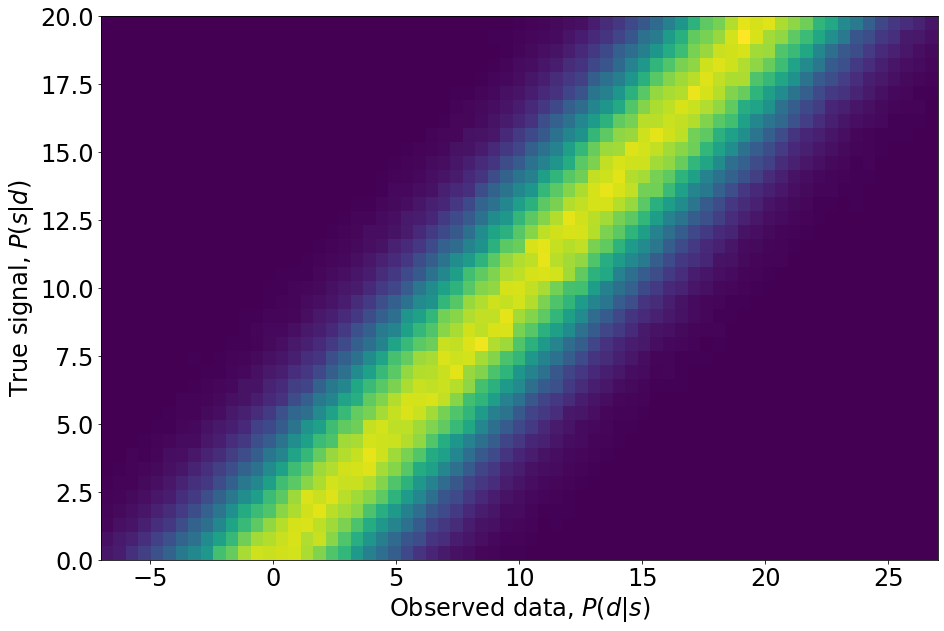

In [3]:
# define our overall data
p1_data = p1_bkgd + p1_signal

# define our bin edges
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

# group the results into bins
p1_Psd, temp, temp2 = np.histogram2d(p1_data, p1_signal, bins=[dataedges,signaledges], density=True)
# note: temp == dataedges and temp2 == signaledges

# plot
def plot_2d_hist(signaledges, dataedges, Psd):
    datacenters = (dataedges[:-1] + dataedges[1:]) / 2
    signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
    plt.pcolormesh(datacenters, signalcenters, Psd.T, shading='auto')
    plt.tick_params(labelsize=24)
    plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
    plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
    plt.show()

plot_2d_hist(signaledges, dataedges, p1_Psd)

Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

### Part B

Select a true injected signal and plot 𝑃(𝑑|𝑠).  Label this plot and clearly explain what is being plotted and how to interpret it.

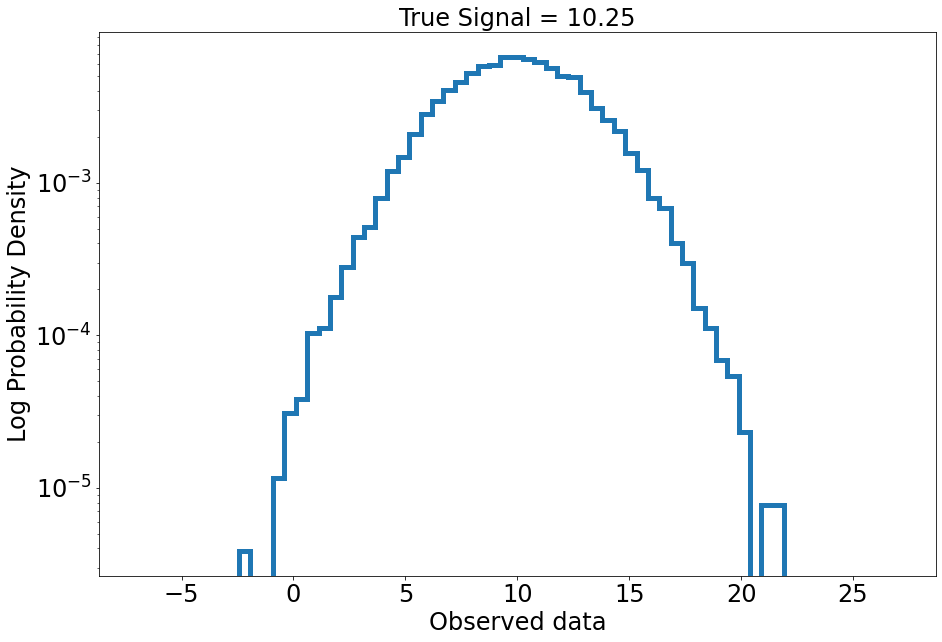

In [5]:
# lets begin by selecting a random true signal value
#p1_true_signal = np.random.uniform(low=signal_low, high=signal_high, size=1)[0]
p1_true_signal = 10.25

# find the bin associated with this value
p1_true_signal_bin_idx = -1
for i in range(0, len(signaledges)-1):
    if signaledges[i] <= p1_true_signal and signaledges[i+1] >= p1_true_signal:
        p1_true_signal_bin_idx = i
        break
        
# now that we have the bin for our signal we can get the associated histogram data
p1_true_signal_probs = p1_Psd[:, p1_true_signal_bin_idx]

# plot a stair plot
plt.stairs(p1_true_signal_probs, dataedges, linewidth=5)
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.title(f'True Signal = {p1_true_signal:.2f}', fontsize=24)
plt.xlabel('Observed data', fontsize=24)
plt.ylabel('Log Probability Density', fontsize=24)
plt.show()

Above we have plotted a horizontal slice from the histogram plot.  This slice is performed at a true signal value of 10.25.  The values from the horizontal bins that corresponded to a true signal value of 10.25 are used to construct this stair style plot.  

This plot is telling us the probabilities associated with us measuring certain observed data values provided our true signal of 10.25 and our background which is a zero mean Gaussian with a standard deviation of 3.  We see that the mean of the distribution above (our sliced distribution) is different than the mean of our background distribution - here the mean of our distribution is exactly our true signal value of 10.25.  Thus we still have a Gaussian distribution but with a new mean of 10.25.  This distribution is symmetric.

We have plotted the probability desnity for us to measure specific Observed data values provided that we have a true signal value of 10.25.

### Part C

Select an observed data value and plot 𝑃(𝑠|𝑑).  Label this plot and clearly explain what is being plotted and how to interpret it.

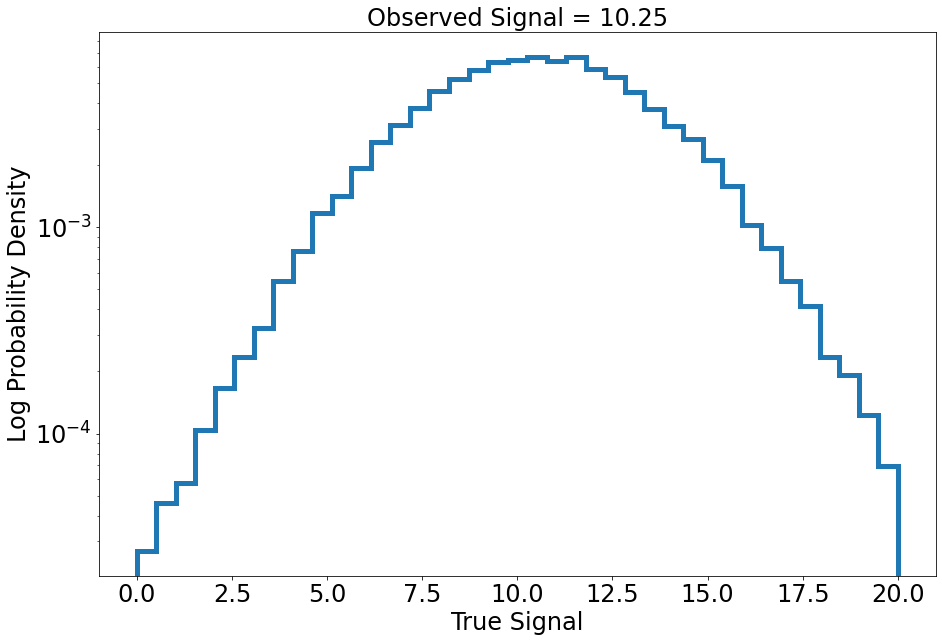

In [9]:
# lets begin by selecting a random true signal value
p1_observed_signal_bin_idx = 34
p1_observed_signal = dataedges[p1_observed_signal_bin_idx]
        
# now that we have the bin for our signal we can get the associated histogram data
p1_observed_signal_probs = p1_Psd[p1_observed_signal_bin_idx, :]

# plot a stair plot
plt.stairs(p1_observed_signal_probs, signaledges, linewidth=5)
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.title(f'Observed Signal = {p1_observed_signal:.2f}', fontsize=24)
plt.xlabel('True Signal', fontsize=24)
plt.ylabel('Log Probability Density', fontsize=24)
plt.show()

Above we have plotted a vertical slice from the histogram plot.  This slice is performed at an observed data value of 10.25.  The values from the vertical bins that corresponded to a observed data value of 10.25 are used to construct this stair style plot. 

This plot is telling us the probabilities associated with us measuring certain true signals provided our observed data value of 10.25 and our background which is a zero mean Gaussian with a standard deviation of 3.  We see that the mean of the distribution above (our sliced distribution) is different than the mean of our background distribution - here the mean of our distribution is exactly our observed signal value of 10.25.  Thus we find that we have a Gaussian distribution with a mean of 10.25.  This distribution is symmetric.

We have plotted the probability desnity for us to measure specific True Signal values provided that we have an observed data value of 10.25.

## Problem 2

Now repeat the above, but with a background with non-zero mean.  Reproduce the graphs above. Lastly overplot the 𝑃(𝑑|𝑠) and 𝑃(𝑠|𝑑) plots. Why are they not centered on the same value? Explain carefully.

For this problem I will choose a Gaussian with mean 6 and a standard deviation of 3.

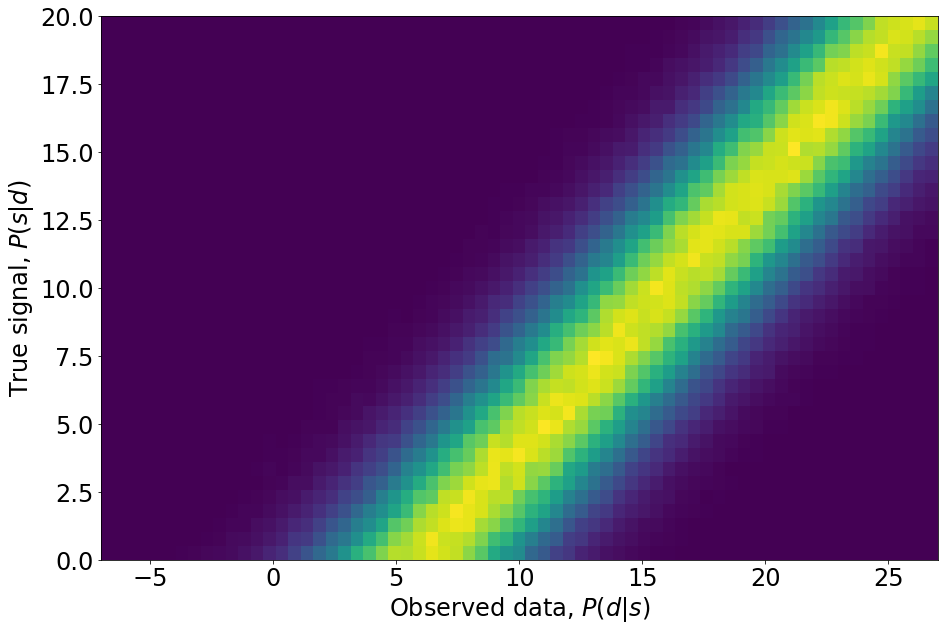

In [10]:
# define our background parameters
p2_mean = 6
p2_std = 3

# draw data for our background
p2_bkgd = stats.norm.rvs(loc=p2_mean, scale=p2_std, size=1000000)

# draw data for our signal
signal_low = 0.0
signal_high = 20.0
p2_signal = np.random.uniform(low=signal_low, high=signal_high, size=1000000)

# define our overall data
p2_data = p2_bkgd + p2_signal

# define our bin edges
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

# group the results into bins
p2_Psd, temp, temp2 = np.histogram2d(p2_data, p2_signal, bins=[dataedges,signaledges], density=True)
# note: temp == dataedges and temp2 == signaledges

# plot
plot_2d_hist(signaledges, dataedges, p2_Psd)

Now that we have the overall histogram for our new distribution, lets plot a veritcal and horizontal slice of this distribution.

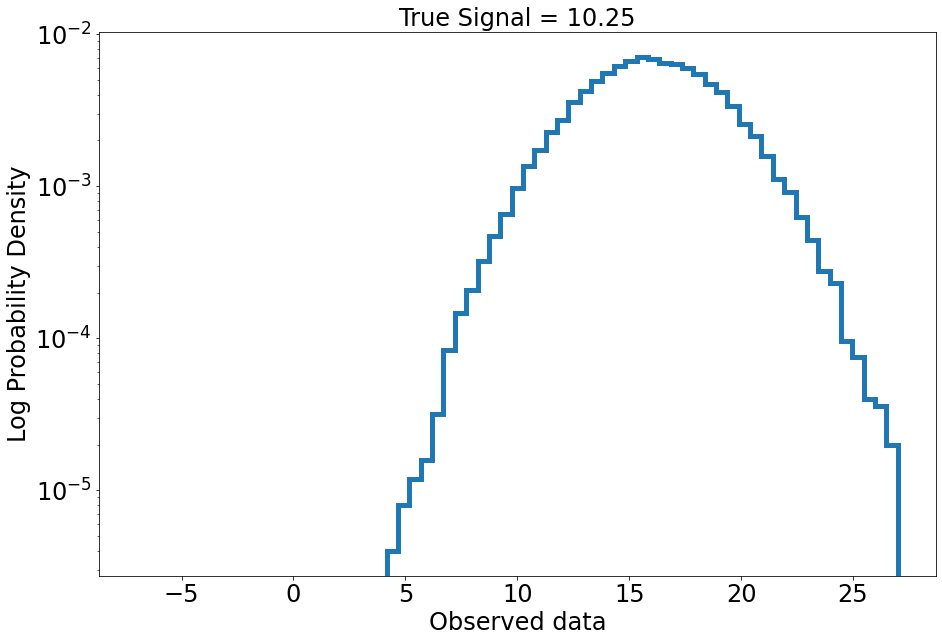

In [11]:
# lets begin by selecting a random true signal value
p2_true_signal = 10.25

# find the bin associated with this value
p2_true_signal_bin_idx = -1
for i in range(0, len(signaledges)-1):
    if signaledges[i] <= p2_true_signal and signaledges[i+1] >= p2_true_signal:
        p2_true_signal_bin_idx = i
        break
        
# now that we have the bin for our signal we can get the associated histogram data
p2_true_signal_probs = p2_Psd[:, p2_true_signal_bin_idx]

# plot a stair plot
plt.stairs(p2_true_signal_probs, dataedges, linewidth=5)
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.title(f'True Signal = {p2_true_signal:.2f}', fontsize=24)
plt.xlabel('Observed data', fontsize=24)
plt.ylabel('Log Probability Density', fontsize=24)
plt.show()

Once again, above we have plotted a horizontal slice from the histogram plot.  This slice is performed at a true signal value of 10.25.  The values from the horizontal bins that corresponded to a true signal value of 10.25 are used to construct this stair style plot.  

This plot is telling us the probabilities associated with us measuring certain observed data values provided our true signal of 10.25 and our background which is a Gaussian with a mean of 6 and a standard deviation of 3.  We see that the mean of the distribution above (our sliced distribution) is different than the mean of our background distribution - here the mean of our distribution is equal our true signal value of 10.25 plus the mean value of the background which is 6. Overall this gives us a mean value of 16.25 (10.25 + 6) for our new distribution.  Thus we still have a Gaussian distribution but with a new mean of 16.25.  This distribution is symmetric.

We have plotted the probability desnity for us to measure specific Observed data values provided that we have a true signal value of 10.25.

Now lets plot a vertical slice:

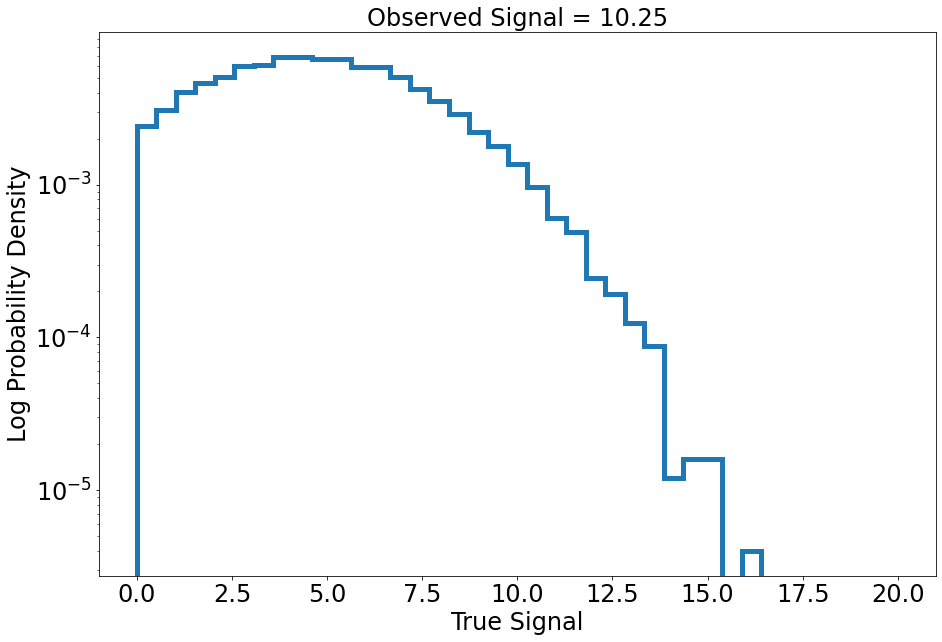

In [13]:
# lets begin by selecting a random true signal value
p2_observed_signal_bin_idx = 34
p2_observed_signal = dataedges[p2_observed_signal_bin_idx]
        
# now that we have the bin for our signal we can get the associated histogram data
p2_observed_signal_probs = p2_Psd[p2_observed_signal_bin_idx, :]

# plot a stair plot
plt.stairs(p2_observed_signal_probs, signaledges, linewidth=5)
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.title(f'Observed Signal = {p2_observed_signal:.2f}', fontsize=24)
plt.xlabel('True Signal', fontsize=24)
plt.ylabel('Log Probability Density', fontsize=24)
plt.show()

Once again, above we have plotted a vertical slice from the histogram plot.  This slice is performed at an observed data value of 10.25.  The values from the vertical bins that corresponded to a observed data value of 10.25 are used to construct this stair style plot. 

This plot is telling us the probabilities associated with us measuring certain observed data values provided our true signal of 10.25 and our background which is a Gaussian with a mean of 6 and a standard deviation of 3.  We see that the mean of the distribution above (our sliced distribution) is different than the mean of our background distribution - here the mean of our distribution is our observed signal value of 10.25 minus the mean of our background which is 6.  Overall this gives us a mean value of 4.25 (10.25 - 6) for our new distribution.  Thus we find that we have a Gaussian distribution with a mean of 4.25.  This distribution is symmetric.

We have plotted the probability desnity for us to measure specific True Signal values provided that we have an observed data value of 10.25.

Lets now overplot these two graphs:

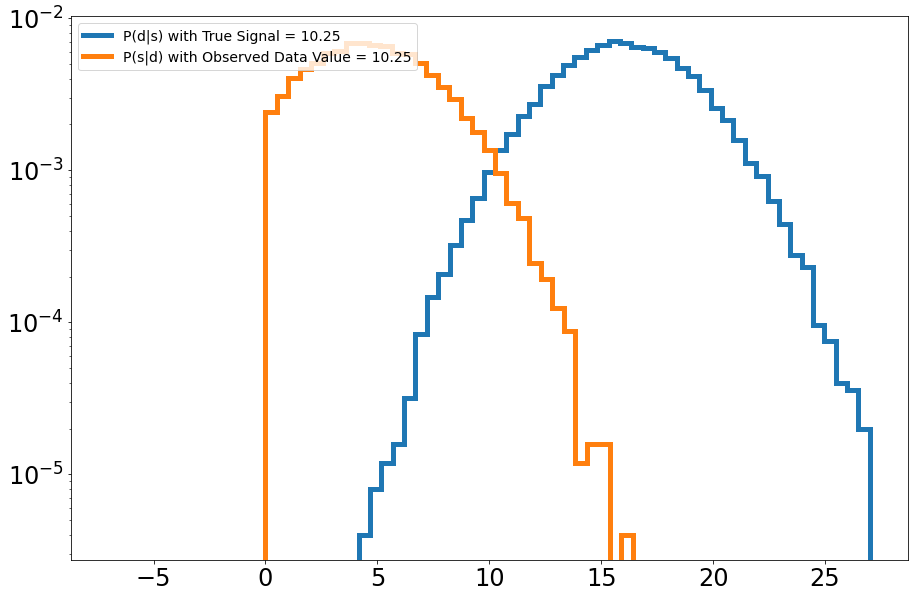

In [14]:
# plot
plt.stairs(p2_true_signal_probs, dataedges, linewidth=5, label=f'P(d|s) with True Signal = {p2_true_signal:.2f}')
plt.stairs(p2_observed_signal_probs, signaledges, linewidth=5, label=f'P(s|d) with Observed Data Value = {p2_observed_signal:.2f}')
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.legend(loc='upper left', fontsize=14)
plt.show()

After overplotting the plot of $P(s|d = 10.25)$ (in orange) and $P(d|s = 10.25)$ (in blue) we find that the two distributions are not centered on the same value.  First of all it is of note that while they are not centered on the same value, both distributions are Gaussians with the same standard deviation.  Now to address why they do not have the same peak, this is because the background distribution is not zero-meaned.  If the background was zero mean then we would find both values to be centered on, approximately, the same value (as we saw in question 1 where both slices were centered on 10.25).

Now to address the direction of the shift, we see that $P(s|d = 10.25)$'s mean shifted left by 6 while $P(d|s = 10.25)$'s mean shifted right by 6.  $P(d|s = 10.25)$ shifts right by 6 because looking back at the histogram for this problem we see that the line has shifted horizontally right by 6 units and, because we are taking horizontal slices, the slices for $P(d|s = 10.25)$ will also shift right.  Now for $P(s|d = 10.25)$ we are taking vertical slices. When we shifted the background right we made events we changed the problability of different true signals along that vertical slice - making events that were less probable previously more probable and making events that were more probable previously less probable.  This is why a value of 10.25 - which used to be the most probable value for the $P(s|d = 10.25)$ with a zero mean background - is now an event with a low probability.